In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('default') 
plt.rc('font',  size=9) 
plt.rc('figure', figsize=(4,3), dpi=150) 

In [3]:
dat = pd.read_csv('OxCGRT_latest.csv')
dat['Date_clean'] = pd.to_datetime(dat['Date'].astype(str))
dat = dat.loc[dat['Date_clean'] >= '02/01/2020']
dat.head()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,Date_clean
31,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200201,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-02-01
32,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200202,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-02-02
33,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200203,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-02-03
34,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200204,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-02-04
35,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200205,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-02-05


In [4]:
us_dat = dat.loc[dat['CountryName']=='United States']
print(us_dat['RegionName'].value_counts())
print(us_dat.columns)

Colorado          396
Utah              396
Louisiana         396
Georgia           396
New Jersey        396
Alaska            396
Iowa              396
Texas             396
Connecticut       396
Arkansas          396
Oklahoma          396
Missouri          396
Minnesota         396
Nebraska          396
Kentucky          396
Maine             396
Oregon            396
Mississippi       396
Wisconsin         396
Kansas            396
Massachusetts     396
Ohio              396
Indiana           396
North Dakota      396
New York          396
Washington        396
South Carolina    396
California        396
Maryland          396
Delaware          396
Vermont           396
New Hampshire     396
Florida           396
West Virginia     396
New Mexico        396
Michigan          396
Hawaii            396
Tennessee         396
Wyoming           396
Rhode Island      396
Virginia          396
Idaho             396
Illinois          396
Pennsylvania      396
Nevada            396
Montana   

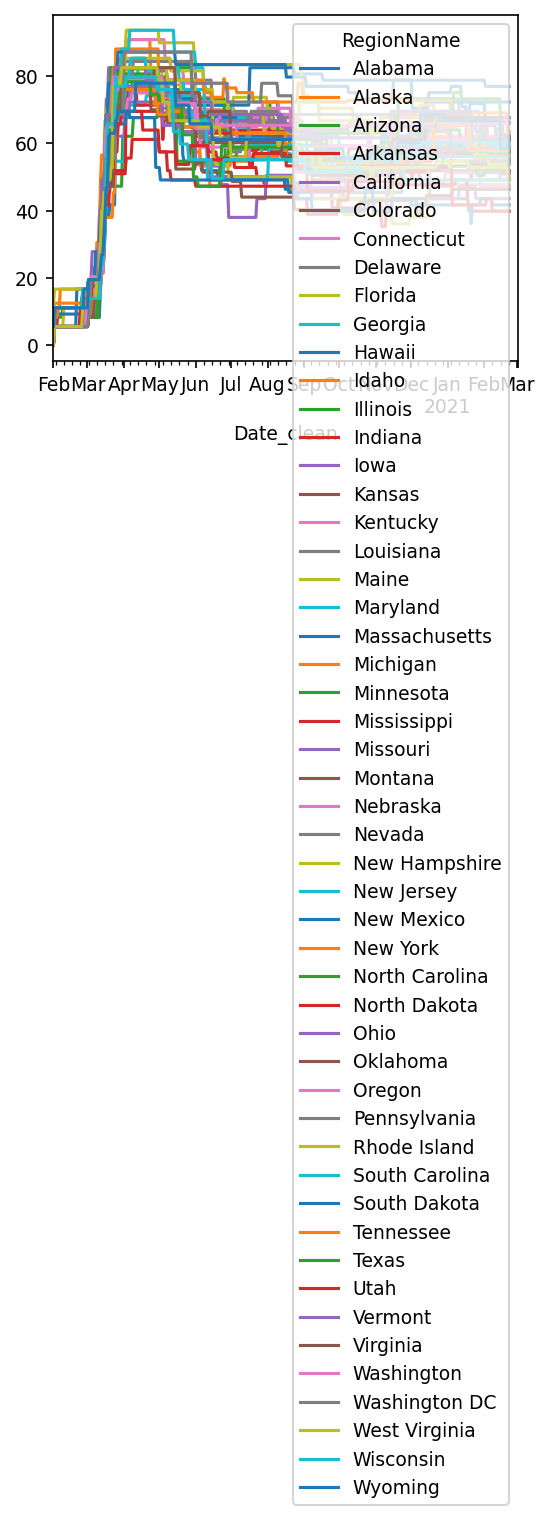

In [5]:
us_dat.groupby(['Date_clean', 'RegionName'])['StringencyIndex'].mean().unstack().plot()
plt.show()

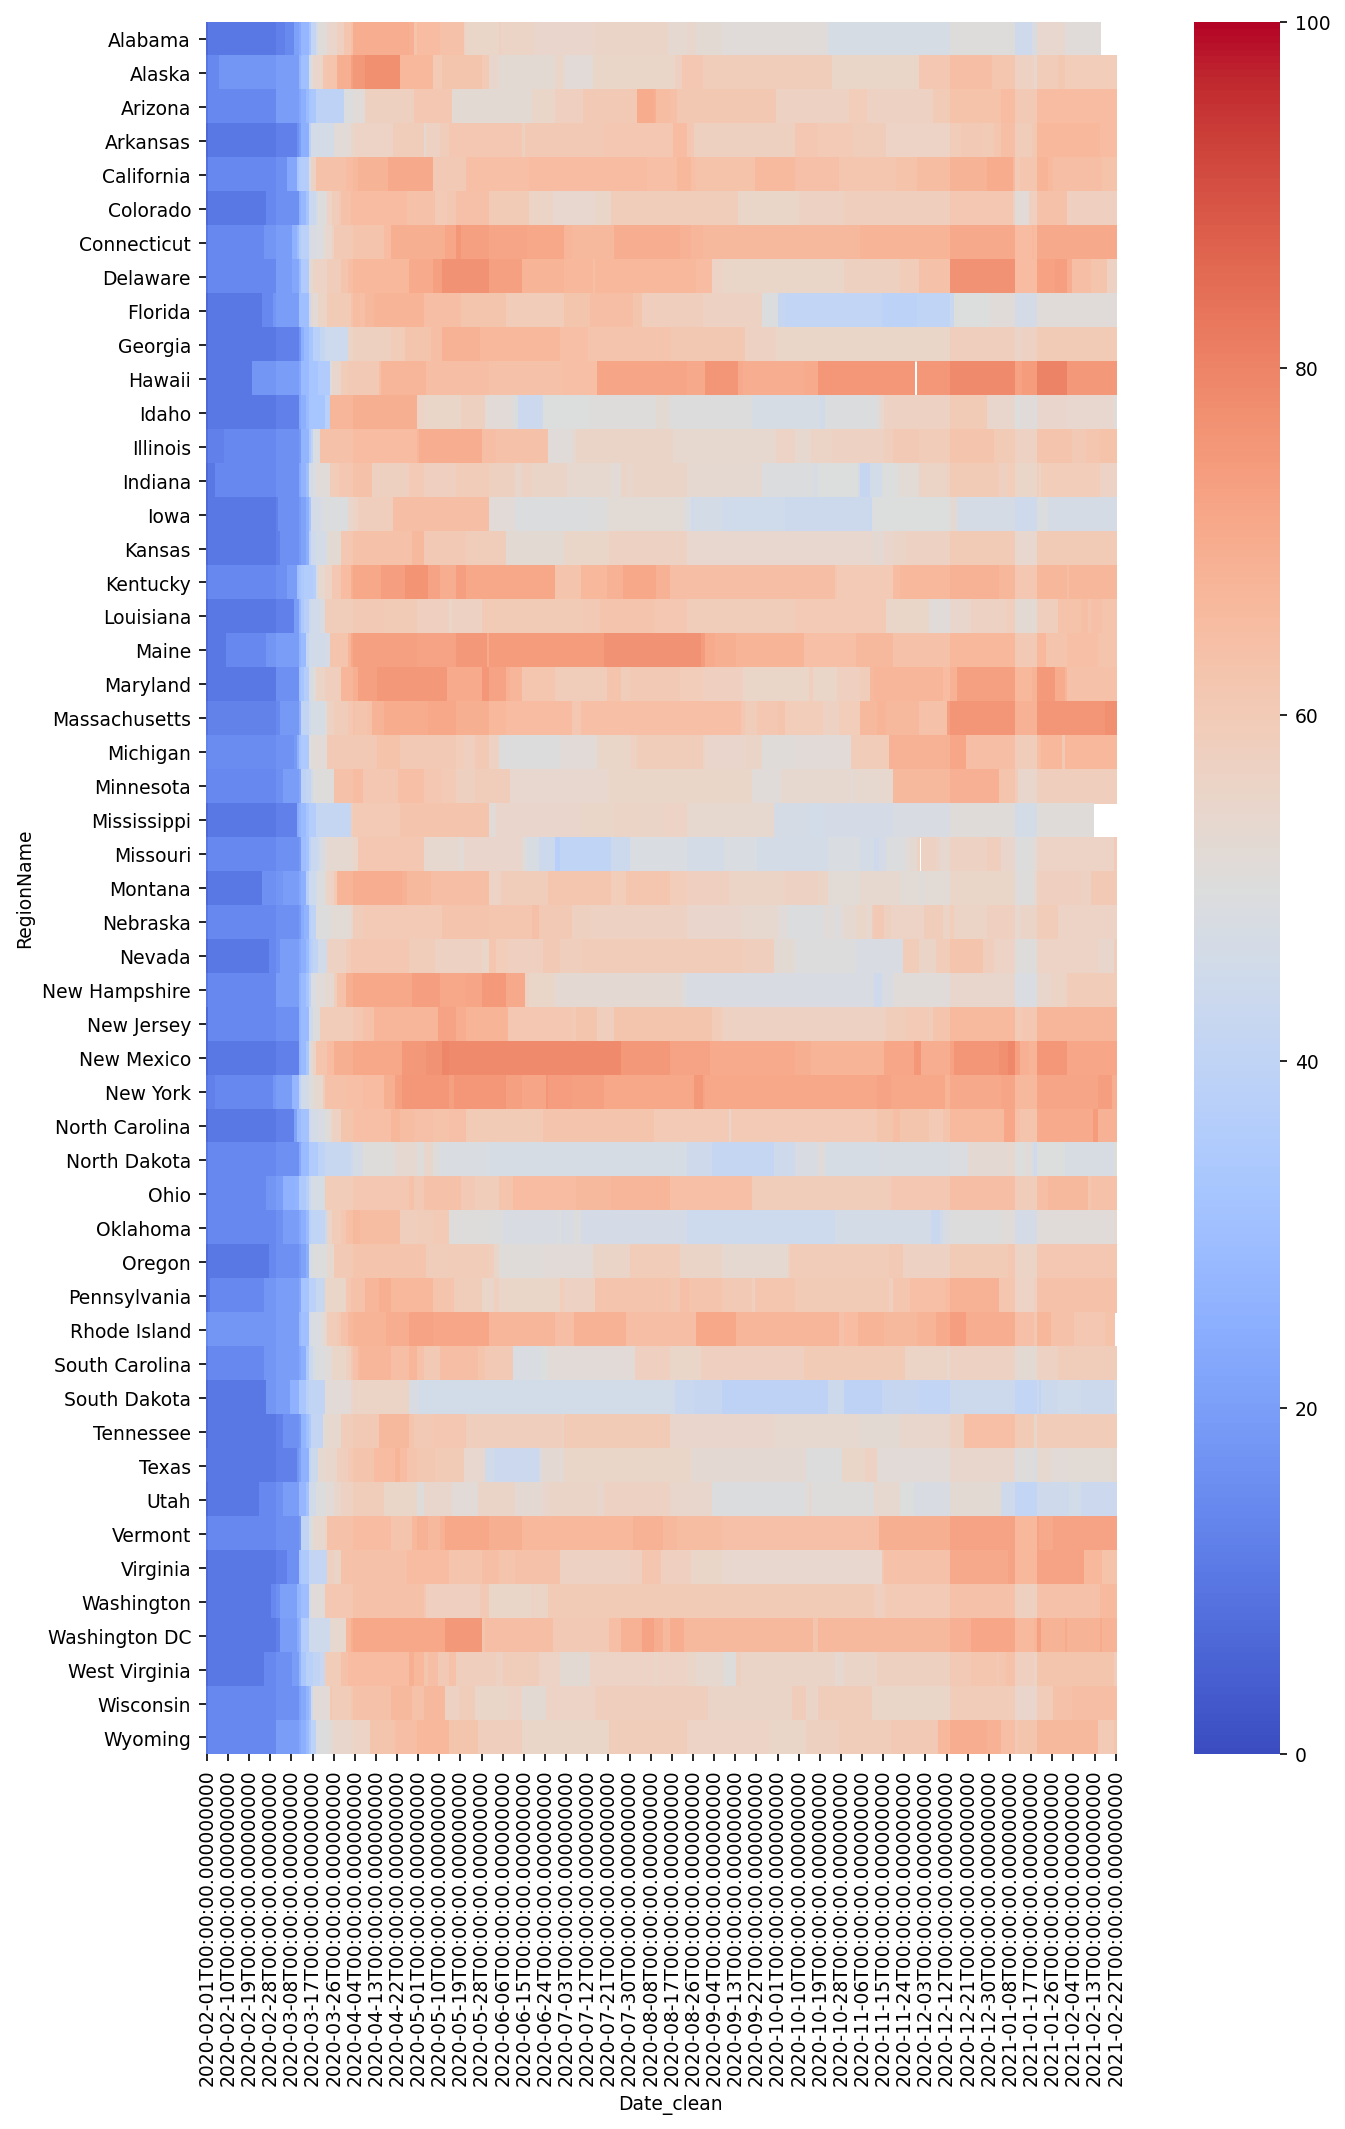

In [6]:
fig,ax = plt.subplots(figsize=(10, 15))
sns.heatmap(us_dat.groupby(['RegionName', 'Date_clean'])['ContainmentHealthIndex'].mean().unstack(), 
            vmin=0, vmax=100, cmap='coolwarm', ax=ax)
plt.show()

In [7]:
us_stringency = us_dat.groupby(['Date_clean', 'RegionName'])['StringencyIndex'].mean().unstack()
us_stringency.head()

RegionName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
Date_clean,,,,,,,,,,,,,,,,,,,,,
2020-02-01,0.00,5.56,5.56,0.00,2.78,0.00,5.56,5.56,0.00,0.00,...,0.00,2.78,0.00,5.56,0.00,0.00,0.00,0.00,5.56,5.56
2020-02-02,5.56,11.11,11.11,5.56,11.11,5.56,11.11,11.11,5.56,5.56,...,5.56,5.56,5.56,11.11,5.56,5.56,5.56,5.56,11.11,11.11
2020-02-03,5.56,11.11,11.11,5.56,11.11,5.56,11.11,11.11,5.56,5.56,...,5.56,5.56,5.56,11.11,5.56,5.56,5.56,5.56,11.11,11.11
2020-02-04,5.56,11.11,11.11,5.56,11.11,5.56,11.11,11.11,5.56,5.56,...,5.56,5.56,5.56,11.11,5.56,5.56,5.56,5.56,11.11,11.11
2020-02-05,5.56,11.11,11.11,5.56,11.11,5.56,11.11,11.11,5.56,5.56,...,5.56,5.56,5.56,11.11,5.56,5.56,5.56,5.56,11.11,11.11


In [8]:
us_stringency.to_csv('./ProcessedData/us_stringency.csv')

In [9]:
us_ContainmentHealthIndex = us_dat.groupby(['Date_clean', 'RegionName'])['ContainmentHealthIndex'].mean().unstack()
us_ContainmentHealthIndex.head()

RegionName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
Date_clean,,,,,,,,,,,,,,,,,,,,,
2020-02-01,6.41,10.26,10.26,6.41,8.33,6.41,10.26,10.26,6.41,6.41,...,6.41,8.33,6.41,10.26,6.41,6.41,6.41,6.41,10.26,10.26
2020-02-02,10.26,14.10,14.10,10.26,14.10,10.26,14.10,14.10,10.26,10.26,...,10.26,10.26,10.26,14.10,10.26,10.26,10.26,10.26,14.10,14.10
2020-02-03,10.26,14.10,14.10,10.26,14.10,10.26,14.10,14.10,10.26,10.26,...,10.26,10.26,10.26,14.10,10.26,10.26,10.26,10.26,14.10,14.10
2020-02-04,10.26,14.10,14.10,10.26,14.10,10.26,14.10,14.10,10.26,10.26,...,10.26,10.26,10.26,14.10,10.26,10.26,10.26,10.26,14.10,14.10
2020-02-05,10.26,14.10,14.10,10.26,14.10,10.26,14.10,14.10,10.26,10.26,...,10.26,10.26,10.26,14.10,10.26,10.26,10.26,10.26,14.10,14.10


In [10]:
us_ContainmentHealthIndex.to_csv('./ProcessedData/us_ContainmentHealthIndex.csv')

In [16]:
np.corrcoef(us_ContainmentHealthIndex['Alabama'][:200], us_stringency['Alabama'][:200])

array([[1.        , 0.93501503],
       [0.93501503, 1.        ]])